# **Exercicio: Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [3]:
df = pd.read_csv('/content/CARRO_CLIENTES (1).csv')

print("Data Types:\n", df.dtypes)

# Verificando se há valores nulos
print("\nVerificando se há valores nulos:\n", df.isnull().sum())

# Remova a coluna 'ID'
if 'ID' in df.columns:
  df = df.drop('ID', axis=1)

print("\nRevendo o dataframe 'ID':")
print(df.head())

Data Types:
 User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

Verificando se há valores nulos:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Revendo o dataframe 'ID':
   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [4]:
df['Gender_Encoded'] = LabelEncoder().fit_transform(df['Gender'])

# Remova a coluna original 'Gender'
df = df.drop('Gender', axis=1)

print("\nDataFrame após aplicar o LabelEncoder e remover a coluna 'Gender':")
print(df.head())


DataFrame após aplicar o LabelEncoder e remover a coluna 'Gender':
   User ID  Age  AnnualSalary  Purchased  Gender_Encoded
0      385   35         20000          0               1
1      681   40         43500          0               1
2      353   49         74000          0               1
3      895   40        107500          1               1
4      661   25         79000          0               1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

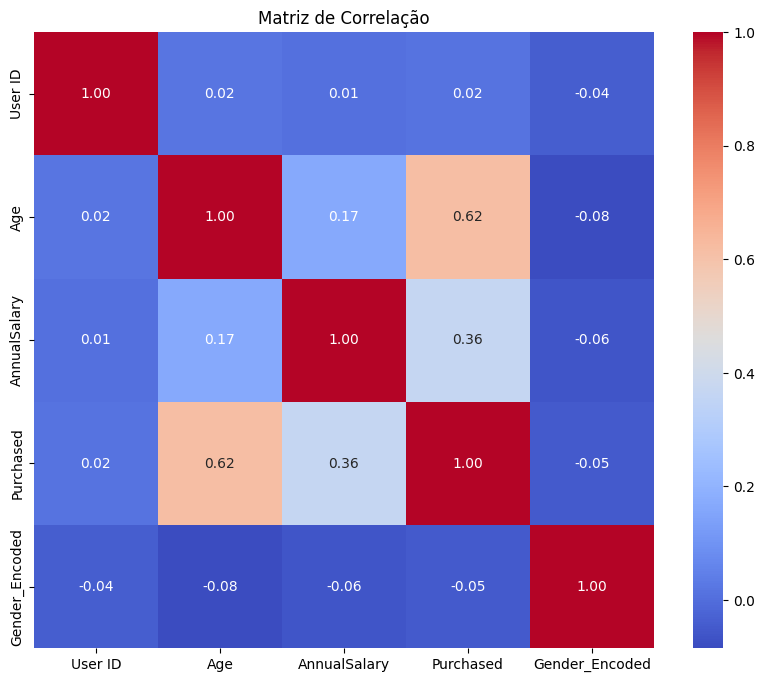


Correlação das variáveis com 'Purchased':
Purchased         1.000000
Age               0.616036
AnnualSalary      0.364974
User ID           0.015911
Gender_Encoded   -0.047211
Name: Purchased, dtype: float64


In [5]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Analise das correlações com a variável 'Purchased'
print("\nCorrelação das variáveis com 'Purchased':")
print(correlation_matrix['Purchased'].sort_values(ascending=False))

# Variáveis com maior correlação com 'Purchased' (além de Purchased consigo mesma)
# Dependendo do resultado da correlação, você pode identificar as variáveis mais correlacionadas.
# Geralmente, você procuraria por valores absolutos mais altos (positivos ou negativos).
# Por exemplo, 'Age' e 'EstimatedSalary' costumam ter correlações significativas com 'Purchased' nesta base de dados.


# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [6]:
# Separando a base em X (features) e Y (target)
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

# Separando os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (700, 4)
Shape of X_test: (300, 4)
Shape of Y_train: (700,)
Shape of Y_test: (300,)


# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [14]:
model = xgb.XGBClassifier(
  objective='binary:logistic',
  n_estimators=100,
  learning_rate=0.1,
  random_state=42
)

model.fit(X_train, Y_train)

print("Modelo XGBoost treinado com sucesso!")

Modelo XGBoost treinado com sucesso!


# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [8]:
# Realizando previsões na base de teste
Y_pred = model.predict(X_test)

# Obtendo as probabilidades das previsões
# predict_proba retorna um array com as probabilidades para cada classe.
# Para classificação binária, a segunda coluna (índice 1) representa a probabilidade da classe positiva (Purchased=1).
Y_pred_proba = model.predict_proba(X_test)[:, 1]

print("\nPrevisões para a base de teste:\n", Y_pred)
print("\nProbabilidades das previsões (probabilidade de Purchased=1):\n", Y_pred_proba)


Previsões para a base de teste:
 [0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1
 0 0 0 1]

Probabilidades das previsões (probabilidade de Purchased=1):
 [3.14466767e-02 9.34702694e-01 6.82218990e-04 1.43452689e-01
 9.74315405e-01 9.38497543e-01 9.90555465e-01 3.09286173e-03
 2.95692566e-03 1.87712791e-03 5.21727139e-03 1.87340158e-03
 2.89493557e-02 9.29391128e-04 9.86577392e-01 2.94972688e-01
 2.27939710e-01 7.75515676e-01 7.49931931e-01 1.4

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.


Avaliação do desempenho do modelo:
Acurácia: 0.8867

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       172
           1       0.89      0.84      0.86       128

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300


Matriz de Confusão:
[[158  14]
 [ 20 108]]


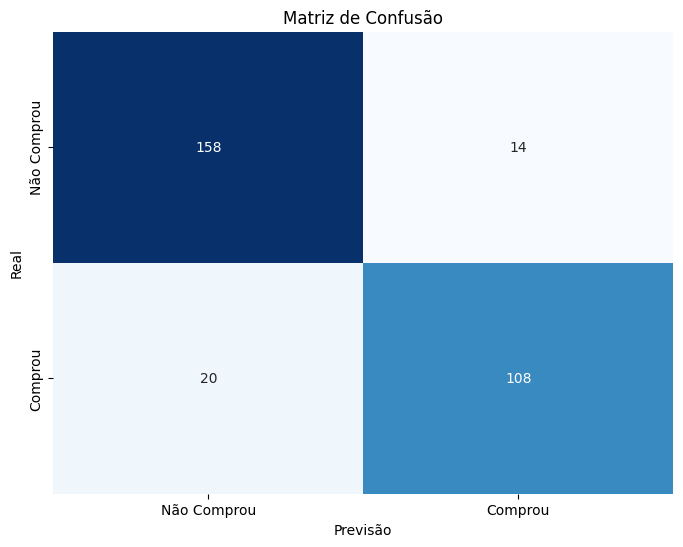

In [9]:
# prompt:  Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

import matplotlib.pyplot as plt

# As previsões binárias já foram obtidas no passo anterior com model.predict(X_test).
# Y_pred contém as previsões binárias (0 ou 1).

# Avaliando o desempenho do modelo
print("\nAvaliação do desempenho do modelo:")

# Acurácia
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Relatório de Classificação (Precision, Recall, F1-Score)
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

# Visualizando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Comprou', 'Comprou'], yticklabels=['Não Comprou', 'Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Interpretação da Matriz de Confusão:
# Onde:
# - O eixo Y representa os valores reais (True Labels).
# - O eixo X representa os valores previstos (Predicted Labels).
# - Superior Esquerdo (True Negatives - TN): Casos reais negativos previstos corretamente como negativos.
# - Superior Direito (False Positives - FP): Casos reais negativos previstos incorretamente como positivos (Erro Tipo I).
# - Inferior Esquerdo (False Negatives - FN): Casos reais positivos previstos incorretamente como negativos (Erro Tipo II).
# - Inferior Direito (True Positives - TP): Casos reais positivos previstos corretamente como positivos.

In [10]:
#SEU CÓDIGO AQUI

# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?


Importância das Features:
Age               0.535482
AnnualSalary      0.300299
Gender_Encoded    0.090441
User ID           0.073778
dtype: float32


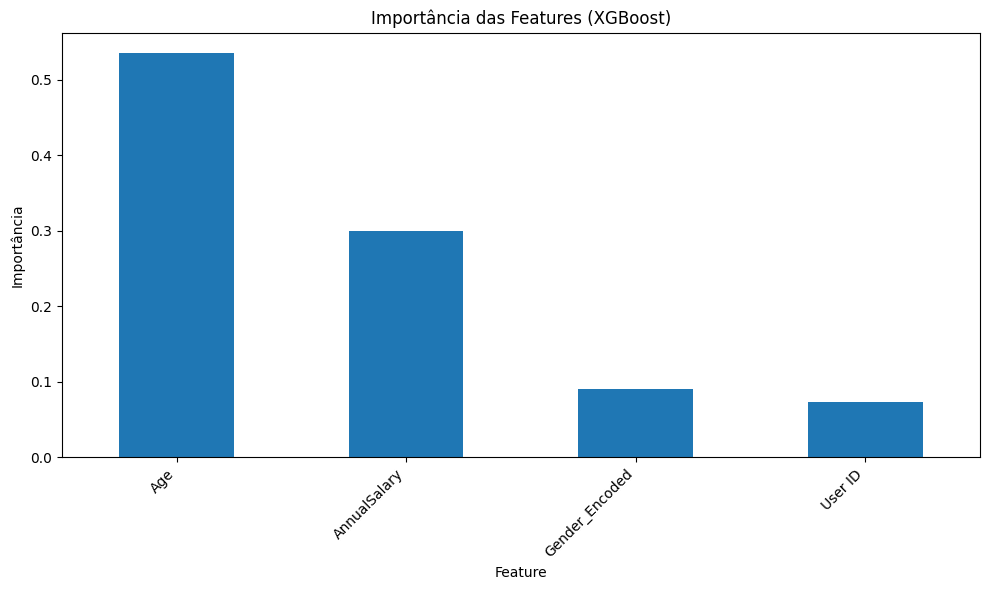

In [11]:

# Obter a importância das features do modelo treinado
feature_importances = model.feature_importances_

# X_train.columns contém os nomes das features
importance_df = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

print("\nImportância das Features:")
print(importance_df)

# Opcional: Visualizar a importância das features
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar')
plt.title('Importância das Features (XGBoost)')
plt.ylabel('Importância')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Comparação com a Matriz de Correlação:
# A importância das features do XGBoost e a correlação na matriz de correlação fornecem insights diferentes.
# A matriz de correlação mostra a relação linear entre cada feature e o target.
# A importância das features do XGBoost reflete o quanto cada feature contribuiu para a redução do erro (ou melhoria da pureza dos nós) nas árvores do modelo.
# Nem sempre as features com maior correlação linear serão as mais importantes para um modelo não linear como o XGBoost, pois o modelo pode capturar interações não lineares e relações complexas.
# No entanto, muitas vezes há uma sobreposição, onde variáveis com alta correlação também aparecem como importantes no modelo.
# Você deve comparar a lista `importance_df` com a saída da célula anterior que imprimiu a correlação com 'Purchased' para ver se as variáveis mais importantes para o modelo são as mesmas que mostraram maior correlação.